In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 25000)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

# Aggression linear word oh

AUC score 0.9434281464773387


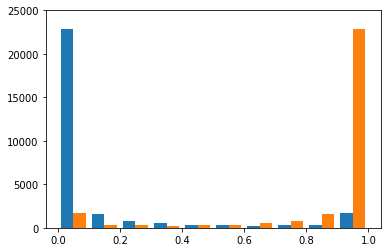

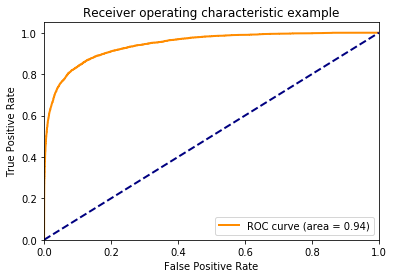

AUC score 0.8107891078800331
CM 24691 527 1340 2408
F1-score 0.7206344456082597
imbalanced_accuracy_score 0.9355451218670165


In [4]:
report_results("linear_word_oh_aggression_prediction_results.csv")

# Aggression linear char oh

AUC score 0.9173706304487989


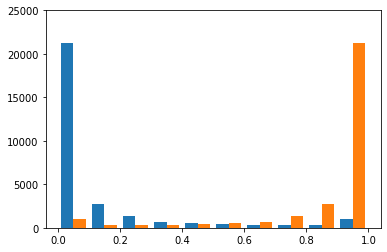

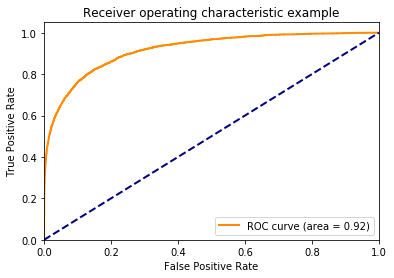

AUC score 0.7552972189697443
CM 24802 498 1722 1944
F1-score 0.6365422396856582
imbalanced_accuracy_score 0.9233584202168059


In [5]:
report_results("linear_char_oh_aggression_prediction_results.csv")

# Aggression mlp word oh

AUC score 0.9413535359427857


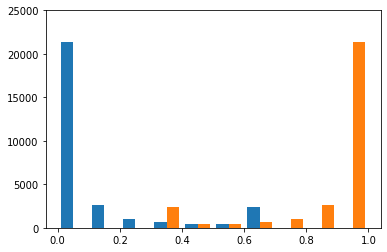

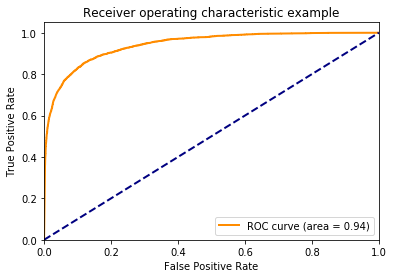

AUC score 0.798117030353758
CM 24712 493 1445 2316
F1-score 0.7050228310502282
imbalanced_accuracy_score 0.9330939722433198


In [6]:
report_results("mlp_word_oh_aggression_prediction_results.csv")

# Aggression mlp char oh

AUC score 0.9377764851936341


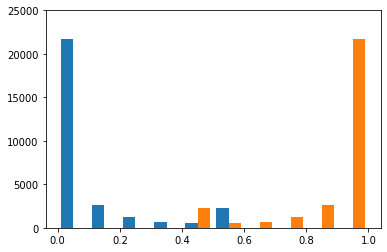

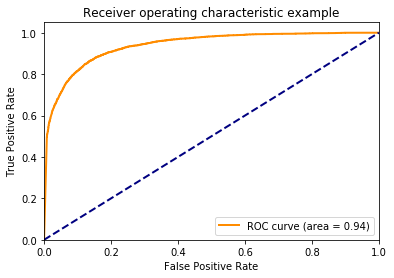

AUC score 0.7582374043898619
CM 25015 292 1727 1932
F1-score 0.6568077511473739
imbalanced_accuracy_score 0.9302975902782573


In [7]:
report_results("mlp_char_oh_aggression_prediction_results.csv")

# Agression lstm word

AUC score 0.9555933152450244


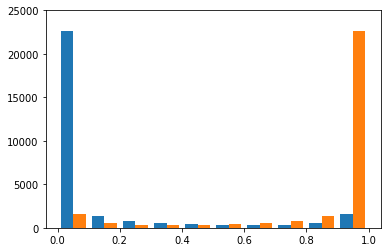

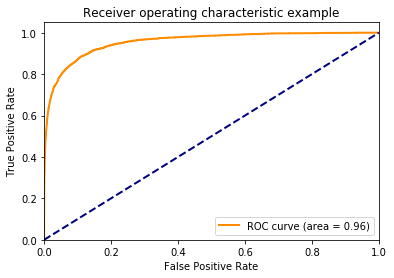

AUC score 0.8371637927403804
CM 24691 541 1136 2598
F1-score 0.7560017459624618
imbalanced_accuracy_score 0.9421045363529655


In [9]:
report_results("lstm_word_oh_aggression_prediction_results.csv")

# Aggression lstm char

AUC score 0.7929897055078095


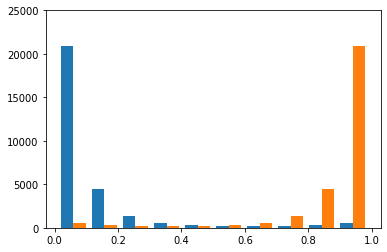

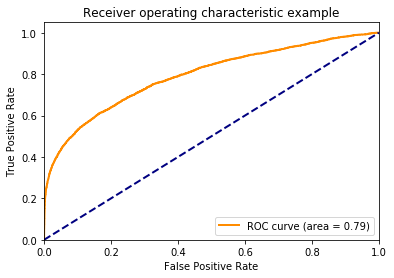

AUC score 0.6395545327411746
CM 24973 304 2615 1074
F1-score 0.42391947898164595
imbalanced_accuracy_score 0.8992266795553407


In [10]:
report_results("lstm_char_oh_aggression_prediction_results.csv")

# aggression conv-lstm word

AUC score 0.9002429773190748


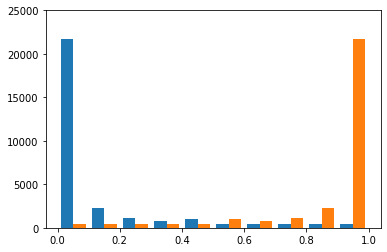

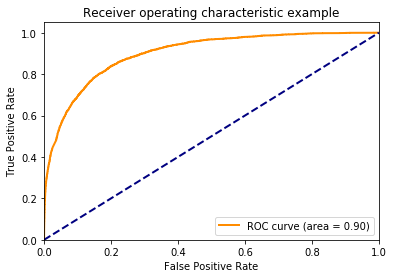

AUC score 0.6991897553324868
CM 24752 515 2150 1549
F1-score 0.5375672392850945
imbalanced_accuracy_score 0.9079955810260305


In [11]:
report_results("conv_lstm_word_oh_aggression_prediction_results.csv")

# aggression conv-lstm char

AUC score 0.9298119174163423


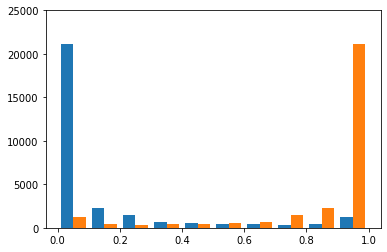

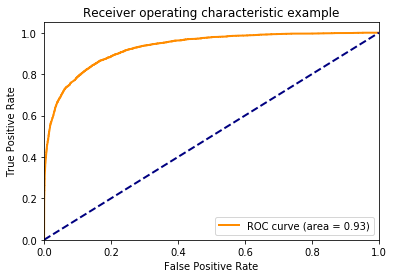

AUC score 0.7949890718524055
CM 24592 788 1359 2227
F1-score 0.6747462505680957
imbalanced_accuracy_score 0.9258786163087758


In [13]:
report_results("conv_lstm_char_oh_aggression_prediction_results.csv")